# Convolutional Neural Networks

# Importar Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from tensorflow.keras.layers import LeakyReLU

# Cargar set de Imágenes

In [3]:
dirname = os.path.join(os.getcwd(),'Datasets')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  a:\repositorios github\IA-Proyectos\proyectos\Unidad2\Datasets\
a:\repositorios github\IA-Proyectos\proyectos\Unidad2\Datasets\gatos 1
a:\repositorios github\IA-Proyectos\proyectos\Unidad2\Datasets\hormigas 13995
a:\repositorios github\IA-Proyectos\proyectos\Unidad2\Datasets\mariquitas 14114
a:\repositorios github\IA-Proyectos\proyectos\Unidad2\Datasets\perros 14017
a:\repositorios github\IA-Proyectos\proyectos\Unidad2\Datasets\tortugas 13991
Directorios leidos: 5
Imagenes en cada directorio [13996, 14114, 14017, 13991, 14007]
suma Total de imagenes en subdirs: 70125


# Creamos las etiquetas

In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  70125


In [5]:
animales=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    animales.append(name[len(name)-1])
    indice=indice+1

0 gatos
1 hormigas
2 mariquitas
3 perros
4 tortugas


In [6]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (56100, 28, 28, 3) (56100,)
Testing data shape :  (14025, 28, 28, 3) (14025,)


Text(0.5, 1.0, 'Ground Truth : 2')

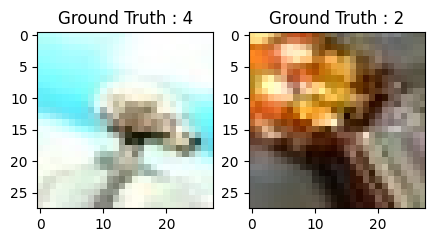

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

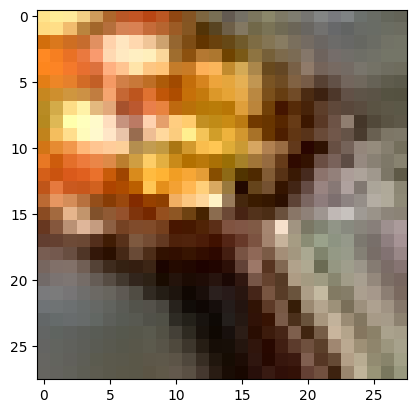

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


# Creamos el Set de Entrenamiento y Validación

In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(44880, 28, 28, 3) (11220, 28, 28, 3) (44880, 5) (11220, 5)


# Creamos el modelo de CNN

In [13]:
INIT_LR = 1e-3 
epochs = 50
batch_size = 64 

In [14]:
print(epochs)
print(type(epochs))

50
<class 'int'>


In [15]:
sport_model = Sequential()

sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28, 28, 3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))

sport_model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2), padding='same'))

sport_model.add(Conv2D(128, kernel_size=(3, 3), activation='linear', padding='same'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2), padding='same'))

sport_model.add(Flatten())

sport_model.add(Dense(64, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))

sport_model.add(Dropout(0.4)) 

sport_model.add(Dense(nClasses, activation='softmax'))

In [16]:
sport_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

In [17]:
sport_model.compile(loss='categorical_crossentropy', 
                    optimizer='adam', 
                    metrics=['accuracy'])

In [18]:
# El 'patience' define cuántas épocas esperar por una mejora antes de detenerse
# Basado en tus gráficas, el pico fue en la época 8, por lo que 10 de paciencia es seguro.
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=0.001, # Mejora mínima requerida para ser considerada una mejora
    mode='min', 
    verbose=1
)

callbacks_list = [early_stopping]

# Entrenamos el modelo: Aprende a clasificar imágenes

In [19]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),callbacks=callbacks_list)

Epoch 1/50


702/702 [==============================] - 9s 11ms/step - loss: 0.9093 - accuracy: 0.6327 - val_loss: 0.7261 - val_accuracy: 0.7167
Epoch 2/50
702/702 [==============================] - 9s 13ms/step - loss: 0.6864 - accuracy: 0.7315 - val_loss: 0.6389 - val_accuracy: 0.7452
Epoch 3/50
702/702 [==============================] - 9s 13ms/step - loss: 0.5914 - accuracy: 0.7650 - val_loss: 0.5586 - val_accuracy: 0.7755
Epoch 4/50
702/702 [==============================] - 10s 15ms/step - loss: 0.5252 - accuracy: 0.7927 - val_loss: 0.5209 - val_accuracy: 0.7924
Epoch 5/50
702/702 [==============================] - 10s 14ms/step - loss: 0.4624 - accuracy: 0.8180 - val_loss: 0.4695 - val_accuracy: 0.8163
Epoch 6/50
702/702 [==============================] - 10s 14ms/step - loss: 0.4135 - accuracy: 0.8379 - val_loss: 0.4676 - val_accuracy: 0.8171
Epoch 7/50
702/702 [==============================] - 9s 13ms/step - loss: 0.3699 - accuracy: 0.8559 - val_loss: 0.4438 - val_accuracy: 0

# Evaluamos la red

In [20]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("Modelos/modelo1.h5")

a:\repositorios github\IA-Proyectos\.venv_keras2\Lib\site-packages\tf_keras\src\engine\training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

439/439 [==============================] - 2s 4ms/step - loss: 0.4927 - accuracy: 0.8598


In [22]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.49266317486763
Test accuracy: 0.8597504496574402


In [23]:
sport_train.history

{'loss': [0.9093248844146729,
  0.6864426136016846,
  0.591447114944458,
  0.5251665711402893,
  0.4624064862728119,
  0.41346558928489685,
  0.369941771030426,
  0.32350191473960876,
  0.2883050739765167,
  0.2647418677806854,
  0.22937913239002228,
  0.20527106523513794,
  0.18786466121673584,
  0.16951718926429749,
  0.15350757539272308,
  0.14744926989078522,
  0.13076084852218628,
  0.12315849214792252],
 'accuracy': [0.6327094435691833,
  0.7314617037773132,
  0.7650178074836731,
  0.7927361726760864,
  0.8180035352706909,
  0.8379456400871277,
  0.8558823466300964,
  0.8727495670318604,
  0.8886586427688599,
  0.8980169296264648,
  0.9108734130859375,
  0.9220365285873413,
  0.9292780756950378,
  0.9354946613311768,
  0.9424688220024109,
  0.9440062642097473,
  0.9509135484695435,
  0.9550356268882751],
 'val_loss': [0.7261266708374023,
  0.6389027833938599,
  0.5585615634918213,
  0.520866870880127,
  0.46950486302375793,
  0.4675558805465698,
  0.4438383877277374,
  0.41895371

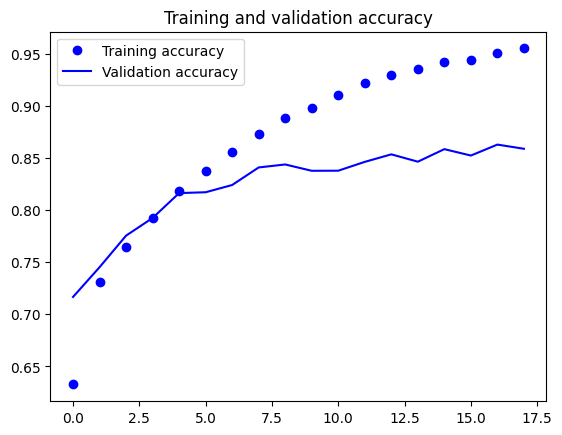

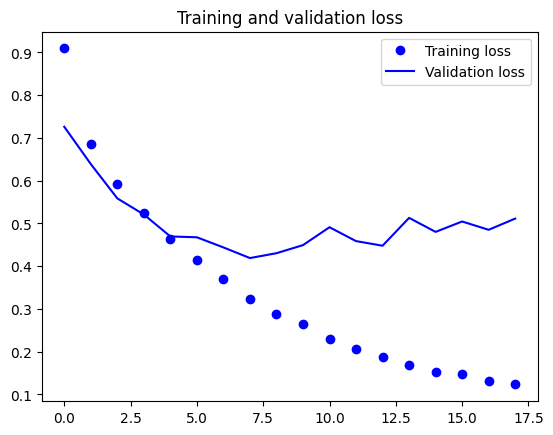

In [24]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
predicted_classes2 = sport_model.predict(test_X)

439/439 [==============================] - 2s 4ms/step


In [26]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [27]:
predicted_classes.shape, test_Y.shape

((14025,), (14025,))

# Aprendamos de los errores: Qué mejorar

Found 12058 correct labels


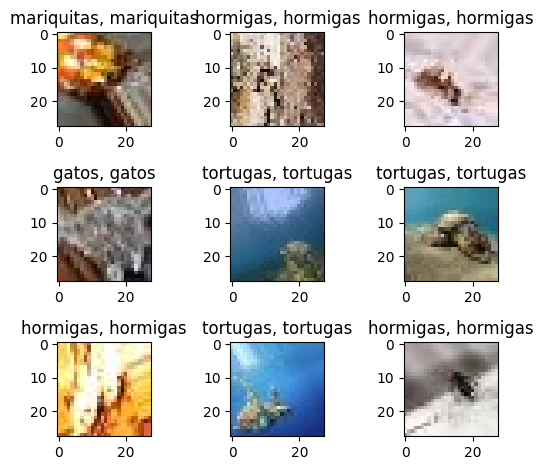

In [28]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(animales[predicted_classes[correct]],
                                                    animales[test_Y[correct]]))

    plt.tight_layout()

Found 1967 incorrect labels


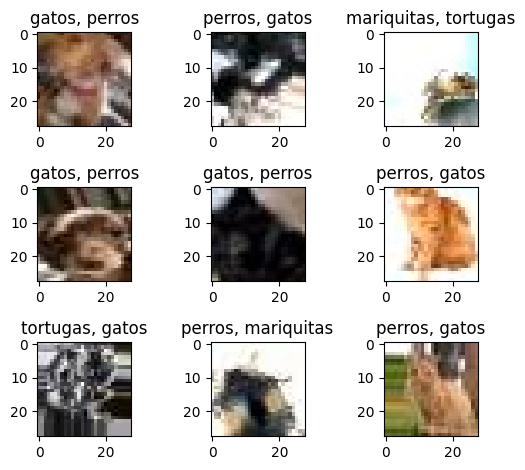

In [29]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(animales[predicted_classes[incorrect]],
                                                    animales[test_Y[incorrect]]))
    plt.tight_layout()

In [30]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.78      0.78      2842
     Class 1       0.87      0.89      0.88      2830
     Class 2       0.93      0.96      0.94      2746
     Class 3       0.79      0.79      0.79      2870
     Class 4       0.94      0.88      0.91      2737

    accuracy                           0.86     14025
   macro avg       0.86      0.86      0.86     14025
weighted avg       0.86      0.86      0.86     14025



In [31]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow.keras.models import load_model


test_dir = 'tests'
modelo_h5 = 'Modelos/modelo1.h5'
sriesgos = ['gatos', 'hormigas', 'mariquitas', 'perros', 'tortugas']
image_extensions = re.compile(r"\.(jpg|jpeg|png|bmp|tiff|WEBP)$", re.IGNORECASE)

try:
    riesgo_model = load_model(modelo_h5)
    print("Modelo cargado exitosamente.")
except Exception as e:
    print(f"ERROR: No se pudo cargar el modelo. {e}")
    exit()

images = []
filenames_found = []

print(f"\nBuscando imágenes en: {test_dir}")
for filename in os.listdir(test_dir):
    # 🌟 CORRECCIÓN CRÍTICA: Solo procesamos archivos de imagen
    if image_extensions.search(filename):
        filepath = os.path.join(test_dir, filename)
        filenames_found.append(filename)
        
        try:
            image = plt.imread(filepath)
            
            if len(image.shape) == 3:
                image_resized = resize(image, (28, 28), anti_aliasing=True, clip=False, preserve_range=True)
                images.append(image_resized)
            
            
        except Exception as e:
            print(f"Error al leer/procesar {filename}. Error: {e}")

if not images:
    print("\nNo se encontraron imágenes válidas o se falló al leer todas.")
else:

    X = np.array(images, dtype=np.uint8) 
    test_X = X.astype('float32')
    test_X = test_X / 255.

    predicted_classes = riesgo_model.predict(test_X) 
    predicted_labels = np.argmax(predicted_classes, axis=1)

    print("\n--- Resultados---")
    for i, label_index in enumerate(predicted_labels):
        print(f"{filenames_found[i]}  {sriesgos[label_index]}")

Modelo cargado exitosamente.

Buscando imágenes en: tests
1/1 [==============================] - 0s 69ms/step

--- Resultados---
gato prueba 3.jpg  gatos
gato prueba 4.jpg  perros
gato prueba 5.jpg  gatos
gato.jpg  gatos
gato1.jpg  gatos
hor1.jpg  perros
hormiga prueba 1.jpg  hormigas
hormiga prueba 2.jpg  hormigas
hormiga prueba 4.jpg  perros
mar1.jpg  mariquitas
mariquita prueba 2.jpg  mariquitas
mariquita prueba 3.jpg  mariquitas
mariquita prueba 4.jpg  gatos
mariquita prueba 5.jpg  gatos
mariquita.jpg  mariquitas
perro prueba 1.jpg  perros
perro prueba3.jpg  gatos
perro1.jpg  gatos
perro2.jpg  perros
perros prueba 4.jpg  perros
perros.jpg  perros
prueba.jpg  hormigas
tort1.jpg  tortugas
tortuga.jpg  tortugas
tortugapruba4.jpg  perros
tortugaprueba2.jpg  tortugas
tortugaprueba3.jpg  tortugas
totugaagua.jpg  perros
